In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten

The flatten layer helps to resize the 28*28 two-dimensional input images of the MNIST dataset into 784 flattened array

In [ ]:
# Data loading
((train_data, train_labels), (test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Normalize
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [5]:
model = K.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(10, activation='sigmoid')
])
model.summary()

c:\Users\erand\anaconda3\envs\study\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# test labels are integer values. there for we use SparseCategoricalCrossentropy  as a loss
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(x = train_data, y = train_labels, epochs=50, verbose=1,validation_split=0.2)

Epoch 1/50


c:\Users\erand\anaconda3\envs\study\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4362 - loss: 2.2556 - val_accuracy: 0.6693 - val_loss: 2.1190
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6664 - loss: 2.0805 - val_accuracy: 0.7224 - val_loss: 1.9526
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7097 - loss: 1.9208 - val_accuracy: 0.7560 - val_loss: 1.8011
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7360 - loss: 1.7748 - val_accuracy: 0.7682 - val_loss: 1.6647
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7521 - loss: 1.6464 - val_accuracy: 0.7849 - val_loss: 1.5418
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7718 - loss: 1.5273 - val_accuracy: 0.7959 - val_loss: 1.4322
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7829 - loss: 1.4242 - val_accuracy: 0.8031 - val_loss: 1.3346
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7871 - loss: 1.3352 - val_accurac

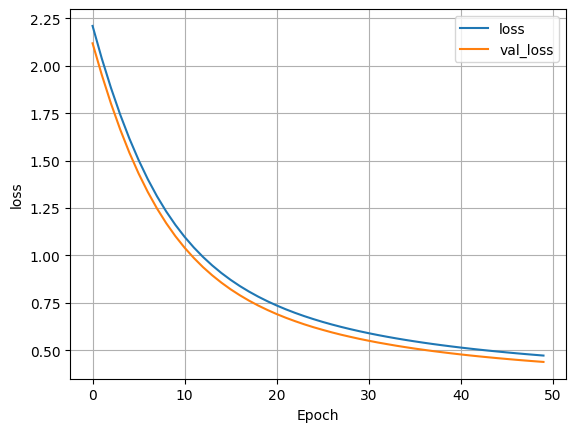

In [7]:
# loss plot

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [17]:
# build two utility functions. these functions helps in visualizing the handwritten digits and the probability of the 10 units
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label, 100*np.max(predictions_array),
                                                    true_label),color = color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color= "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


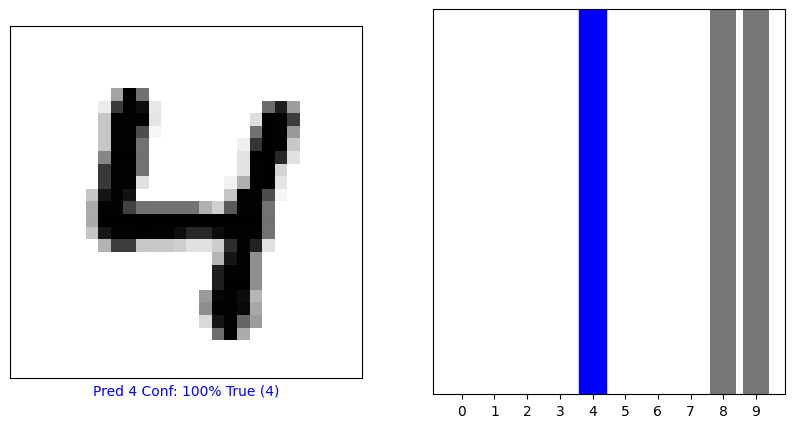

In [18]:
# plot the predictions
predictions = model.predict(test_data)
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


In [19]:
better_model = K.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

better_model.summary()

c:\Users\erand\anaconda3\envs\study\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)